# example of shifted variables for MFDCCA

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from typing import Any, List
import os
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import pickle
import seaborn as sns
from collections import defaultdict

In [2]:
import fathon
from fathon import fathonUtils as fu
from scipy.stats import norm


In [3]:
reconLOBs = '/media/ak/Data/InterestRateFuturesData/ReconstructedLOB'
symbols = os.listdir(reconLOBs)
symbolIdx = 6
symbolFolder = os.path.join( reconLOBs, symbols[symbolIdx])
print(symbolFolder)
figuresLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures' # location to store the figures
print(os.path.isdir(figuresLocation))

/media/ak/Data/InterestRateFuturesData/ReconstructedLOB/OE1
True


In [4]:
symbolFolders = [os.path.join(reconLOBs, symbol) for symbol in symbols]

In [5]:
symbolFolders[3].split("/")[-1]

'G_1'

In [6]:
files = os.listdir(symbolFolder)

In [7]:
# dfLOB.columns.values

## take a subset of Data

In [8]:
idx = 5
all_dfs  = dict()
dfCorrel= pd.DataFrame()
filePath = os.path.join(symbolFolder, files[idx])
dfLOB =pd.read_pickle(filePath)
    # _=plt.hist(TradedVolume, bins =100)
dfCorrel['microPriceReturns'] = dfLOB.copy().MicroPrice.pct_change().fillna(0)
dfCorrel['averageVolumePerTrade'] = dfLOB.copy().AverageVolumePerTrade.fillna(0)
dfCorrel['OrderBookImbalance'] = dfLOB.copy().OrderImbalance.fillna(0)
dfCorrel['MeanRelativeTickVolume'] = dfLOB.copy().MeanRelativeTickVolume.fillna(0)
dfCorrel['TradedVolume'] = dfLOB.copy().TradedVolume.fillna(0)

all_dfs[idx] = dfCorrel

# print(alldfs)


In [9]:
import os
import pandas as pd
from collections import defaultdict
from concurrent.futures import ProcessPoolExecutor

def process_file(idx, symbolFolder, files):
    allvalues = defaultdict(dict)
    filePath = os.path.join(symbolFolder, files[idx])
    dfLOB = pd.read_pickle(filePath)
    allvalues[idx]['microPriceReturns'] = dfLOB.MicroPrice.pct_change().fillna(0)
    allvalues[idx]['averageVolumePerTrade'] = dfLOB.AverageVolumePerTrade.fillna(0)
    allvalues[idx]['OrderBookImbalance'] = dfLOB.OrderImbalance.fillna(0)
    allvalues[idx]['TradedVolume'] = dfLOB.TradedVolume.fillna(0)
    allvalues[idx]['MeanRelativeTickVolume'] = dfLOB.MeanRelativeTickVolume.fillna(0)
    return allvalues


In [10]:

# symbolFolder = symbolFolder
# files = files

# with ProcessPoolExecutor() as executor:
#     results = list(executor.map(process_file, range(len(files)), [symbolFolder]*len(files), [files]*len(files)))

# allvalues = defaultdict(dict)
# for result in results:
#     allvalues.update(result)

# print(allvalues)


In [11]:
# allvalues.keys()

In [12]:
pd.read_pickle('/media/ak/Data/InterestRateFuturesData/MFDFA/XM1/tick/20180906_mfdfa.pkl')['tick']

{'micro_price_change': 0        0.000000e+00
 1        0.000000e+00
 2       -6.317277e-06
 3        2.774265e-06
 4        7.076707e-06
              ...     
 16108    9.359453e-09
 16109    0.000000e+00
 16110    1.728427e-05
 16111   -9.577206e-09
 16112    1.867745e-08
 Name: pct_changes, Length: 16113, dtype: float64,
 'arrival_rate_median': 0        0.000023
 1        0.000012
 2        0.000012
 3        0.000012
 4        0.000012
            ...   
 16108    0.000046
 16109    0.000046
 16110    0.000046
 16111    0.000046
 16112    0.000029
 Name: arrival_rate_median, Length: 16113, dtype: float64,
 'simple_vol': 0             NaN
 1             NaN
 2             NaN
 3        0.002535
 4        0.001744
            ...   
 16108    0.003466
 16109    0.000081
 16110    0.003496
 16111    0.003497
 16112    0.000141
 Name: simple_vol, Length: 16113, dtype: float64,
 'median_traded_volume': 0         8.0
 1         3.0
 2         3.0
 3         2.0
 4         1.0
          .

In [13]:
df = pd.read_pickle('/media/ak/Data/InterestRateFuturesData/MFDCCA/DU1/20180417.pkl')

In [ ]:
dfcorr =df.corr()

In [ ]:
dfcorr.shape

In [ ]:
pd.read_pickle('/media/ak/Data/InterestRateFuturesData/MFDCCA/YM1/20180612.pkl').T

In [ ]:
medianDF = pd.read_pickle('/media/ak/Data/InterestRateFuturesData/MFDCCA/median_df_per_symbol/YM1_median_lagged_correl.pkl')

In [ ]:
medianDF

In [ ]:
def create_heatmap(df, tick_fontsize):
    """
    Takes a Pandas DataFrame as input and creates a heatmap using Seaborn.

    Args:
        df (pd.DataFrame): The input dataframe.
        tick_fontsize (int): The font size of the x and y tick labels.

    Returns:
        None.
    """
    # Set the font and color parameters
    plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'

    # Create the heatmap
    plt.figure(figsize=(10, 8), dpi=300) # Set the size of the figure
    ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', cbar=False)

    # Set the font size of the x and y tick labels
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)

    # Show the plot
    plt.show()

In [ ]:
create_heatmap(medianDF, tick_fontsize=10)

In [14]:
def create_heatmap_too(df, symbol, tick_fontsize=12):
    """
    Takes a Pandas DataFrame as input and creates a heatmap using Seaborn.

    Args:
        df (pd.DataFrame): The input dataframe.
        symbol (str): Symbol to be included in the title.
        tick_fontsize (int): The font size of the x and y tick labels.

    Returns:
        None.
    """
    # Set the font and color parameters
    plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    
    # Rename columns here
    # df = df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'})

    # Calculate correlations, round them and convert to percentage
    corr_df = df.corr().mul(100).applymap(lambda x: round(x, 1))

    # Create the heatmap
    plt.figure(figsize=(12, 10))  # Increase the size of the figure
    ax = sns.heatmap(corr_df, cmap='coolwarm', annot=False, fmt='.1f', cbar=True,  linewidth=.5, annot_kws={"size": 10})

    # Set the font size of the x and y tick labels
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.set_yticks([])

    # Add a title
    plt.title(str(symbol))
    title = str(symbol)+'_lagged_correl_heatmap.png'
    fig_location = os.path.join(figuresLocation , title)
    plt.savefig(fig_location)

    # Show the plot
    plt.show()


In [ ]:
create_heatmap_too(medianDF,   'YM1', 10)

In [ ]:
medianDF.columns.values
df = medianDF.rename(columns={'OrderBookImbalance': 'OBI',
                              'OrderBookImbalance_lag_1_lag_2':'OBI-l3'})

In [ ]:
medianDF.columns.values

In [ ]:
df = medianDF.rename(columns={
    'microPriceReturns':'mPR', 
    'averageVolumePerTrade':'avgVpT', 
    'OrderBookImbalance':'OBI',
    'MeanRelativeTickVolume':'avgRTV', 
    'TradedVolume':'TV',
    'microPriceReturns_lag_1':'mPR-lag1', 
    'averageVolumePerTrade_lag_1':'avgRTV-lag',
    'OrderBookImbalance_lag_1' : 'OBI-lag1', 
    'MeanRelativeTickVolume_lag_1' : 'avgRTV-lag1',
    'TradedVolume_lag_1':'TV-lag1', 
    'microPriceReturns_lag_2':'mPR-lag2',
    'averageVolumePerTrade_lag_2':'avgVpT-lag2', 
    'OrderBookImbalance_lag_2':'OBI-lag2',
    'MeanRelativeTickVolume_lag_2': 'avgRTV-lag2',
    'TradedVolume_lag_2':'TV-lag2',
    'microPriceReturns_lag_1_lag_2':'mPR-lag3',
    'averageVolumePerTrade_lag_1_lag_2':'avgVpT-lag3',
    'OrderBookImbalance_lag_1_lag_2':'OBI-lag3',
    'MeanRelativeTickVolume_lag_1_lag_2':'avgRTV-lag3', 
    'TradedVolume_lag_1_lag_2':'TV-lag3'})


In [ ]:
df

In [ ]:
create_heatmap_too(df, 'YM1', 16)

In [ ]:
from tabulate import tabulate

# Create a dictionary mapping old names to new ones
name_mapping = {
    'microPriceReturns':'mPR', 
    'averageVolumePerTrade':'avgVpT', 
    'OrderBookImbalance':'OBI',
    'MeanRelativeTickVolume':'avgRTV', 
    'TradedVolume':'TV',
    'microPriceReturns_lag_1':'mPR-lag1', 
    'averageVolumePerTrade_lag_1':'avgRTV-lag',
    'OrderBookImbalance_lag_1' : 'OBI-lag1', 
    'MeanRelativeTickVolume_lag_1' : 'avgRTV-lag1',
    'TradedVolume_lag_1':'TV-lag1', 
    'microPriceReturns_lag_2':'mPR-lag2',
    'averageVolumePerTrade_lag_2':'avgVpT-lag2', 
    'OrderBookImbalance_lag_2':'OBI-lag2',
    'MeanRelativeTickVolume_lag_2': 'avgRTV-lag2',
    'TradedVolume_lag_2':'TV-lag2',
    'microPriceReturns_lag_1_lag_2':'mPR-lag3',
    'averageVolumePerTrade_lag_1_lag_2':'avgVpT-lag3',
    'OrderBookImbalance_lag_1_lag_2':'OBI-lag3',
    'MeanRelativeTickVolume_lag_1_lag_2':'avgRTV-lag3', 
    'TradedVolume_lag_1_lag_2':'TV-lag3'}

# Prepare the data for the table
table_data = []
for old, new in name_mapping.items():
    # Split the old name into words and capitalize the first letter of each word
    old_formatted = ' '.join(word.capitalize() for word in old.split('_'))
    table_data.append([new, old, old_formatted])

# Create the table in LaTeX format
latex_table = tabulate(table_data, headers=['New Name', 'Old Name', 'Old Name Formatted'], tablefmt='latex')

# Print the LaTeX code
print(latex_table)


In [15]:
# Rename the columns
column_name_mapping = {
    'mPR': 'microPriceReturns',
    'avgVpT': 'averageVolumePerTrade',
    'OBI': 'OrderBookImbalance',
    'avgRTV': 'MeanRelativeTickVolume',
    'TV': 'TradedVolume',
    'mPR-lag1': 'microPriceReturns_lag_1',
    'avgRTV-lag1': 'averageVolumePerTrade_lag_1',
    'OBI-lag1': 'OrderBookImbalance_lag_1',
    'avgRTV-lag1': 'MeanRelativeTickVolume_lag_1',
    'TV-lag1': 'TradedVolume_lag_1',
    'mPR-lag2': 'microPriceReturns_lag_2',
    'avgVpT-lag2': 'averageVolumePerTrade_lag_2',
    'OBI-lag2': 'OrderBookImbalance_lag_2',
    'avgRTV-lag2': 'MeanRelativeTickVolume_lag_2',
    'TV-lag2': 'TradedVolume_lag_2'
}

# Create a DataFrame for the LaTeX table
latex_df = pd.DataFrame(list(column_name_mapping.items()), columns=['New Name', 'Old Name'])

# Format the Old Name column
latex_df['Old Name'] = latex_df['Old Name'].str.replace('_', ' ').str.title()

# Generate the LaTeX table
latex_table = latex_df.to_latex(index=False)

# Print the LaTeX table
print(latex_table)


\begin{tabular}{ll}
\toprule
   New Name &                     Old Name \\
\midrule
        mPR &            Micropricereturns \\
     avgVpT &        Averagevolumepertrade \\
        OBI &           Orderbookimbalance \\
     avgRTV &       Meanrelativetickvolume \\
         TV &                 Tradedvolume \\
   mPR-lag1 &      Micropricereturns Lag 1 \\
avgRTV-lag1 & Meanrelativetickvolume Lag 1 \\
   OBI-lag1 &     Orderbookimbalance Lag 1 \\
    TV-lag1 &           Tradedvolume Lag 1 \\
   mPR-lag2 &      Micropricereturns Lag 2 \\
avgVpT-lag2 &  Averagevolumepertrade Lag 2 \\
   OBI-lag2 &     Orderbookimbalance Lag 2 \\
avgRTV-lag2 & Meanrelativetickvolume Lag 2 \\
    TV-lag2 &           Tradedvolume Lag 2 \\
\bottomrule
\end{tabular}



In [ ]:
# Rename the columns
column_name_mapping = {
    'mPR': 'microPriceReturns',
    'avgVpT': 'averageVolumePerTrade',
    'OBI': 'OrderBookImbalance',
    'avgRTV': 'MeanRelativeTickVolume',
    'TV': 'TradedVolume',
    'mPR-lag1': 'microPriceReturns_lag_1',
    'avgRTV-lag1': 'averageVolumePerTrade_lag_1',
    'OBI-lag1': 'OrderBookImbalance_lag_1',
    'avgRTV-lag1': 'MeanRelativeTickVolume_lag_1',
    'TV-lag1': 'TradedVolume_lag_1',
    'mPR-lag2': 'microPriceReturns_lag_2',
    'avgVpT-lag2': 'averageVolumePerTrade_lag_2',
    'OBI-lag2': 'OrderBookImbalance_lag_2',
    'avgRTV-lag2': 'MeanRelativeTickVolume_lag_2',
    'TV-lag2': 'TradedVolume_lag_2'
}

# Create a DataFrame for the LaTeX table
latex_df = pd.DataFrame(list(column_name_mapping.items()), columns=['New Name', 'Old Name'])

# Add a third column for definitions
latex_df['Definitions'] = ''

# Format the Old Name column
latex_df['Old Name'] = latex_df['Old Name'].str.replace('_', ' ').str.title()

# Generate the LaTeX table
latex_table = latex_df.to_latex(index=False)

# Print the LaTeX table
print(latex_table)


## doing all 3 dataframes together


In [16]:
mfdcca = '/media/ak/Data/InterestRateFuturesData/MFDCCA/median_df_per_symbol'
os.listdir(mfdcca)

['DU1_median_lagged_correl.pkl',
 'FB1_median_lagged_correl.pkl',
 'FV1_median_lagged_correl.pkl',
 'JB1_median_lagged_correl.pkl',
 'KE1_median_lagged_correl.pkl',
 'RX1_median_lagged_correl.pkl',
 'US1_median_lagged_correl.pkl',
 'UST10y_median_lagged_correl.pkl',
 'UST5y_median_lagged_correl.pkl',
 'XM1_median_lagged_correl.pkl',
 'YM1_median_lagged_correl.pkl']

In [17]:
rx1DF = pd.read_pickle(os.path.join(mfdcca,'RX1_median_lagged_correl.pkl' ))
jb1DF = pd.read_pickle(os.path.join(mfdcca,'JB1_median_lagged_correl.pkl' ))
us1DF = pd.read_pickle(os.path.join(mfdcca,'US1_median_lagged_correl.pkl' ))


In [18]:
def rename_columns(dfs):
    column_name_mapping = {
        'microPriceReturns':'mPR', 
        'averageVolumePerTrade':'avgVpT', 
        'OrderBookImbalance':'OBI',
        'MeanRelativeTickVolume':'avgRTV', 
        'TradedVolume':'TV',
        'microPriceReturns_lag_1':'mPR-lag1', 
        'averageVolumePerTrade_lag_1':'avgRTV-lag',
        'OrderBookImbalance_lag_1' : 'OBI-lag1', 
        'MeanRelativeTickVolume_lag_1' : 'avgRTV-lag1',
        'TradedVolume_lag_1':'TV-lag1', 
        'microPriceReturns_lag_2':'mPR-lag2',
        'averageVolumePerTrade_lag_2':'avgVpT-lag2', 
        'OrderBookImbalance_lag_2':'OBI-lag2',
        'MeanRelativeTickVolume_lag_2': 'avgRTV-lag2',
        'TradedVolume_lag_2':'TV-lag2',
        'microPriceReturns_lag_1_lag_2':'mPR-lag3',
        'averageVolumePerTrade_lag_1_lag_2':'avgVpT-lag3',
        'OrderBookImbalance_lag_1_lag_2':'OBI-lag3',
        'MeanRelativeTickVolume_lag_1_lag_2':'avgRTV-lag3', 
        'TradedVolume_lag_1_lag_2':'TV-lag3'}

    return [df.rename(columns=column_name_mapping) for df in dfs]

In [19]:
# Assuming rx1DF, jb1DF, and us1DF are your original DataFrames
dfs = [rx1DF, jb1DF, us1DF]

# Call the function
renamed_dfs = rename_columns(dfs)

# The function returns a list of DataFrames, so you can unpack them like this:
rx1df1new, jb1df2new, us1df3new = renamed_dfs

In [20]:
rx1df1new

,mPR,avgVpT,OBI,avgRTV,TV,mPR-lag1,avgRTV-lag,OBI-lag1,avgRTV-lag1,TV-lag1,mPR-lag2,avgVpT-lag2,OBI-lag2,avgRTV-lag2,TV-lag2,mPR-lag3,avgVpT-lag3,OBI-lag3,avgRTV-lag3,TV-lag3
0,1.216628e-05,14.75,0.999423,15.111811,27.5,3.074310e-05,2.00,0.614808,0.00000,2.0,5.159836e-06,2.00,0.642761,0.000000,2.0,-1.136707e-03,2.00,0.479651,0.000000,2.0
1,-2.910115e-05,5.50,0.140463,1.185240,6.5,3.438727e-06,17.25,0.058657,0.00000,30.0,6.658733e-06,17.25,-0.195528,0.000000,30.0,-9.998271e-07,17.25,-0.231164,0.000000,30.0
2,1.216146e-06,18.05,0.546573,3.555720,126.5,-1.492313e-05,13.05,0.508204,0.00000,122.5,8.111551e-07,13.05,0.149802,0.000000,122.5,1.803315e-05,13.05,0.518846,71.410712,122.5
3,2.415582e-08,1.50,0.214104,0.296310,1.5,3.195315e-06,7.00,0.213342,0.59262,7.0,1.216146e-06,18.05,0.546573,3.555720,126.5,-1.492313e-05,13.05,0.508204,0.000000,122.5
4,1.021201e-05,8.50,0.233867,1.777860,8.5,1.095942e-07,6.00,-0.353399,0.00000,6.0,-7.358861e-06,6.00,0.838688,3.259410,6.0,2.415582e-08,1.50,0.214104,0.296310,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49970110,7.572174e-06,7.40,-0.844003,0.000000,37.0,7.173871e-06,7.40,0.909660,0.00000,37.0,1.366571e-06,7.40,0.676282,0.000000,37.0,0.000000e+00,7.40,0.631825,29.243239,37.0
49970111,-1.370757e-05,3.50,-0.993469,0.000000,7.0,3.407937e-05,3.50,-0.547529,0.00000,7.0,0.000000e+00,3.50,-0.328088,5.532505,7.0,-2.496526e-05,7.40,-0.328088,0.000000,37.0
49970112,5.849016e-05,25.00,-0.538498,0.000000,25.0,-3.083355e-05,25.00,-0.720608,0.00000,25.0,1.426753e-07,25.00,0.561848,0.000000,25.0,8.629064e-06,25.00,0.557207,0.000000,25.0
49970113,-3.953270e-05,147.00,-0.810526,0.000000,147.0,1.557315e-05,147.00,0.475610,0.00000,147.0,1.559879e-05,147.00,-0.031031,0.000000,147.0,0.000000e+00,147.00,-0.538498,116.182599,147.0


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# def plot_heatmaps(df1, df2, df3, title1, title2, title3):
#     fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#     # Ensure all dataframes have the same columns
#     assert (df1.columns == df2.columns).all()
#     assert (df1.columns == df3.columns).all()
  
#     sns.heatmap(df1, ax=axes[0], cbar=False)
#     axes[0].set_title(title1)

#     sns.heatmap(df2, ax=axes[1], cbar=False)
#     axes[1].set_title(title2)
#     axes[1].set_yticks([])  # Hide y-ticks for the middle plot

#     sns.heatmap(df3, ax=axes[2])
#     axes[2].set_title(title3)
#     axes[2].set_yticks([])  # Hide y-ticks for the right-most plot

#     fig.tight_layout()
#     plt.show()

In [ ]:
# plot_heatmaps(rx1df1new, jb1df2new, us1df3new, 'RX1', 'JB1', 'US1')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
title1 ='RX1'
title2 = 'JB1'
title3 = 'US1'

sns.heatmap(rx1df1new,ax=axes[0], cbar=False)
axes[0].set_title(title1)

sns.heatmap(jb1df2new, ax=axes[1], cbar=False)
axes[1].set_title(title2)
axes[1].set_yticks([])  # Hide y-ticks for the middle plot


In [ ]:
rx1df1new

In [ ]:
create_heatmap_too(rx1df1new, 'RX1', 16)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# def create_heatmaps(df1, df2, df3, symbol1, symbol2, symbol3, figuresLocation, tick_fontsize=12):

#     plt.rcParams['font.sans-serif'] = 'Verdana'
#     plt.rcParams['axes.edgecolor']='#333F4B'
#     plt.rcParams['axes.linewidth']=0.8
#     plt.rcParams['xtick.color']='#333F4B'
#     plt.rcParams['ytick.color']='#333F4B'
    
#     # Calculate correlations, round them and convert to percentage for each dataframe
#     corr_df1 = df1.corr().mul(100).applymap(lambda x: round(x, 1))
#     corr_df2 = df2.corr().mul(100).applymap(lambda x: round(x, 1))
#     corr_df3 = df3.corr().mul(100).applymap(lambda x: round(x, 1))

#     fig, axes = plt.subplots(1, 3, figsize=(36, 12), sharey=True)
#     cbar_ax = fig.add_axes([.91, .3, .03, .4])

#     sns.heatmap(corr_df1, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[0], linewidth=.5, annot_kws={"size": 10})
#     axes[0].set_title(symbol1)
#     axes[0].tick_params(axis='x', labelsize=tick_fontsize)
#     axes[0].tick_params(axis='y', labelsize=tick_fontsize)
    
#     sns.heatmap(corr_df2, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[1], linewidth=.5, annot_kws={"size": 10})
#     axes[1].set_title(symbol2)
#     axes[1].tick_params(axis='x', labelsize=tick_fontsize)
#     axes[1].set_yticks([])

#     sns.heatmap(corr_df3, cmap='coolwarm', annot=False, fmt='.1f', cbar_ax=cbar_ax, ax=axes[2], linewidth=.5, annot_kws={"size": 10})
#     axes[2].set_title(symbol3)
#     axes[2].tick_params(axis='x', labelsize=tick_fontsize)
#     axes[2].set_yticks([])

#     fig.tight_layout(rect=[0, 0, .9, 1])
    
#     # Construct the file path and save the figure
#     title = '{}_{}_{}_correlation_heatmaps.png'.format(symbol1, symbol2, symbol3)
#     fig_location = os.path.join(figuresLocation, title)
#     plt.savefig(fig_location)

#     plt.show()

In [ ]:
create_heatmaps(rx1df1new, jb1df2new, us1df3new, 'RX1', 'JB1', 'US1', figuresLocation, tick_fontsize=16)

In [42]:
def create_heatmaps_too(df1, df2, df3, symbol1, symbol2, symbol3, figuresLocation, tick_fontsize=20):
    # Set the font and color parameters
    plt.rcParams['font.sans-serif'] = 'Verdana'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    
    # Calculate correlations, round them and convert to percentage for each dataframe
    corr_df1 = df1.corr().mul(100).applymap(lambda x: round(x, 1))
    corr_df2 = df2.corr().mul(100).applymap(lambda x: round(x, 1))
    corr_df3 = df3.corr().mul(100).applymap(lambda x: round(x, 1))

    fig, axes = plt.subplots(1, 3, figsize=(40, 16), sharey=True)
    cbar_ax = fig.add_axes([.91, .20, .03, .76])  # Adjust colorbar to span the full length

    sns.heatmap(corr_df1, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[0], linewidth=.5)
    axes[0].set_title(symbol1, fontsize=26)
    axes[0].tick_params(axis='x', labelsize=tick_fontsize)
    axes[0].tick_params(axis='y', labelsize=tick_fontsize)

    sns.heatmap(corr_df2, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[1], linewidth=.5, annot_kws={"size": 14})
    axes[1].set_title(symbol2, fontsize=26)
    axes[1].tick_params(axis='x', labelsize=tick_fontsize)
    axes[1].set_yticks([])  # Hide y-ticks for the middle plot

    sns.heatmap(corr_df3, cmap='coolwarm', annot=False, fmt='.1f', cbar_ax=cbar_ax, ax=axes[2], linewidth=.5, annot_kws={"size": 28})
    axes[2].set_title(symbol3, fontsize=26)
    axes[2].tick_params(axis='x', labelsize=tick_fontsize)
    axes[2].set_yticks([])  # Hide y-ticks for the right-most plot

    fig.tight_layout(rect=[0, 0, .9, 1])

    # Construct the file path and save the figure
    title = '{}_{}_{}_correlation_heatmaps.png'.format(symbol1, symbol2, symbol3)
    fig_location = os.path.join(figuresLocation, title)
    plt.savefig(fig_location)

    plt.show()

/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


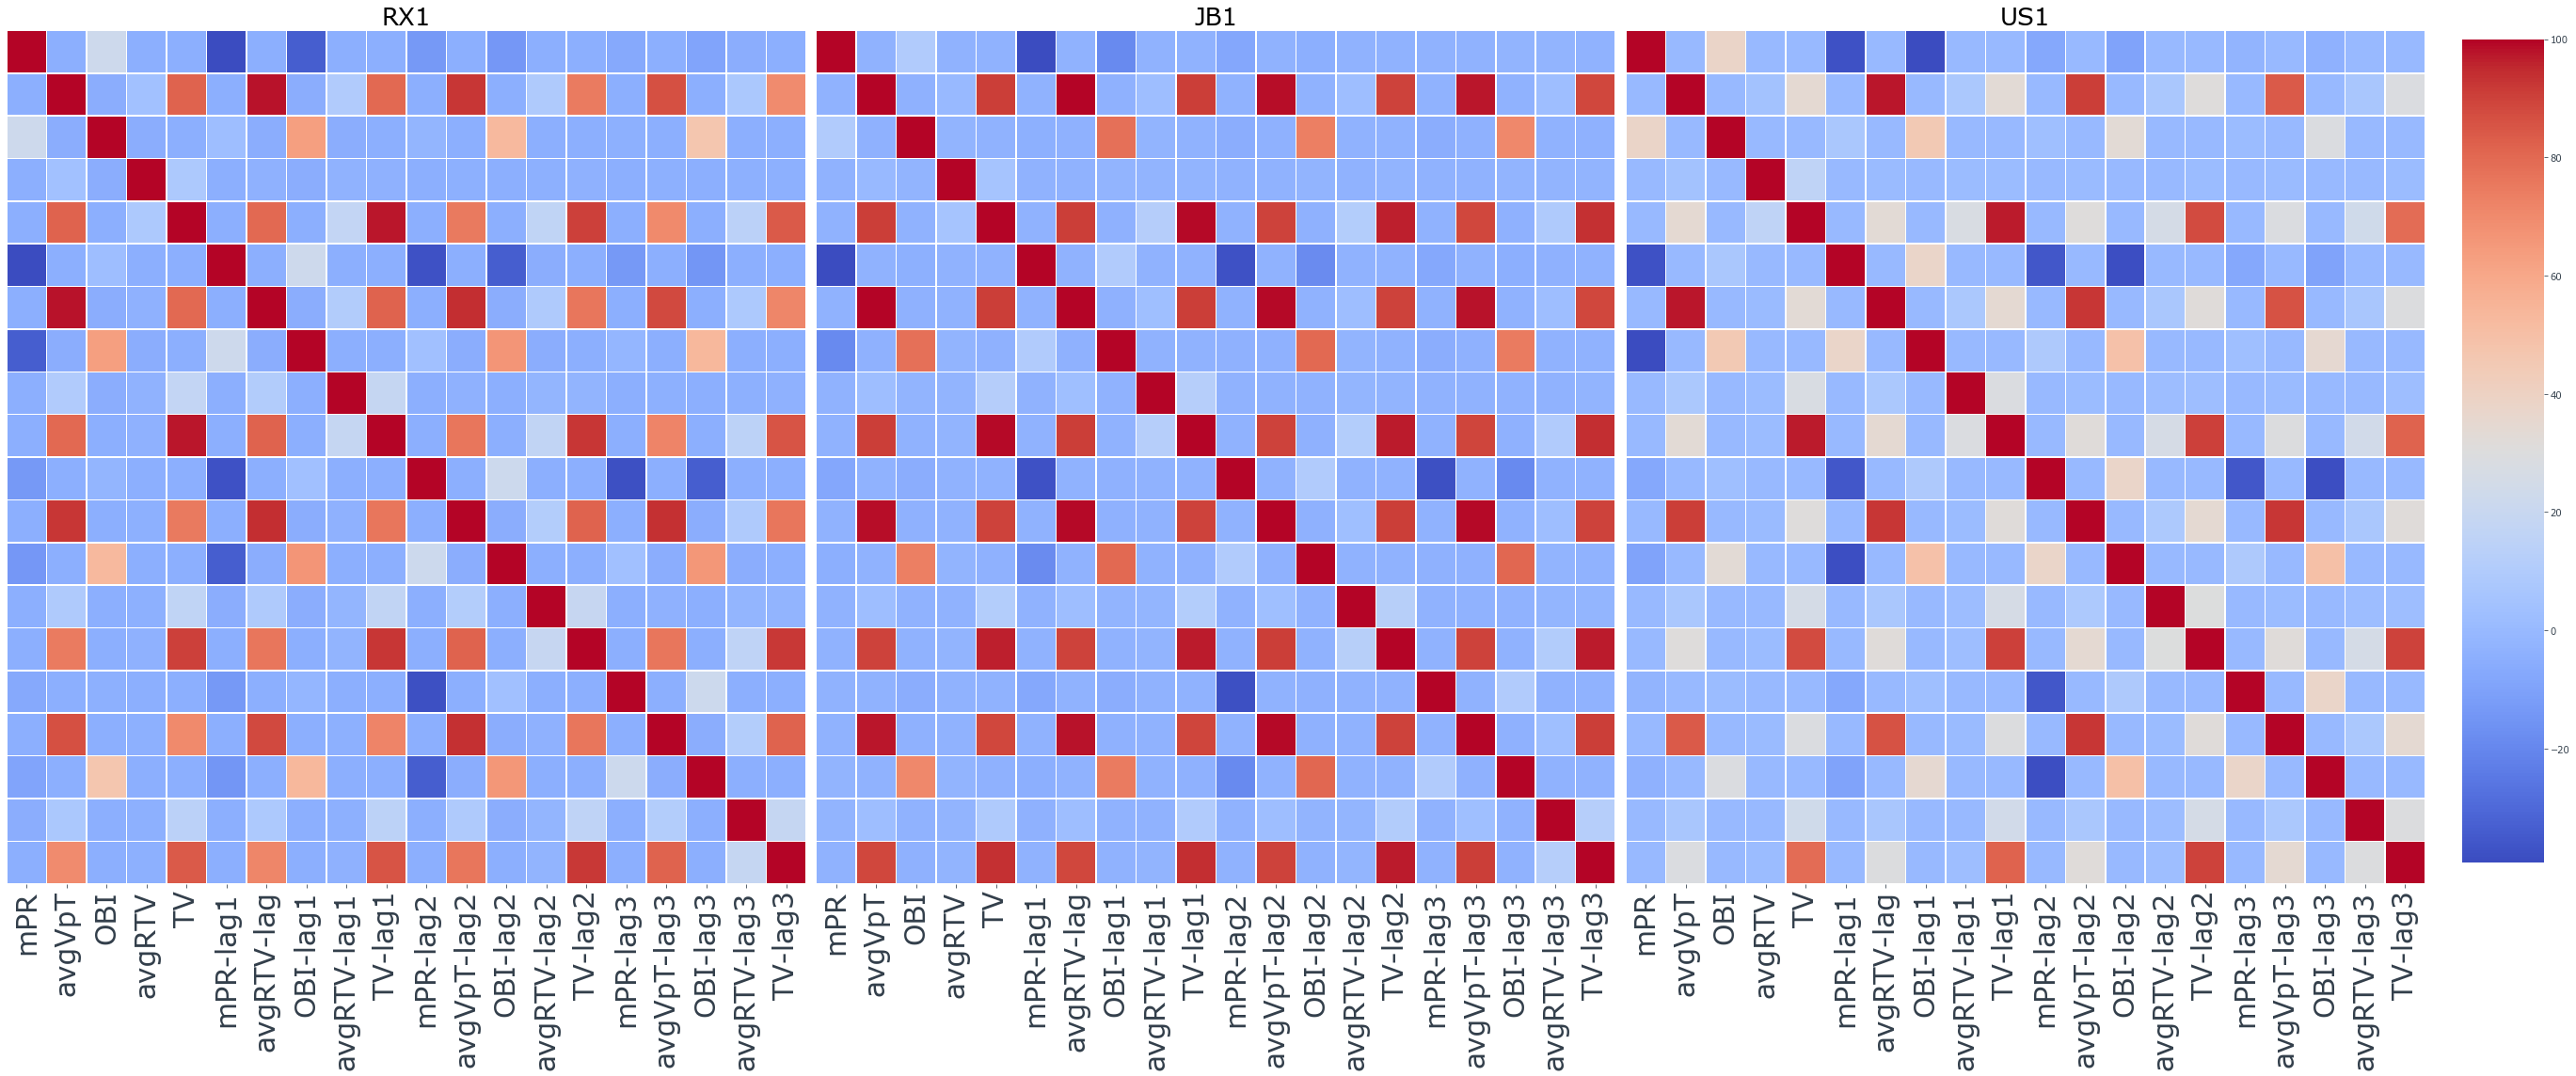

In [43]:
create_heatmaps_too(rx1df1new, jb1df2new, us1df3new, 'RX1', 'JB1', 'US1', figuresLocation, tick_fontsize=30)

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

def create_heatmaps_three(df1, df2, df3, symbol1, symbol2, symbol3, figuresLocation, tick_fontsize=20):
    # Set the font and color parameters
    plt.rcParams['font.sans-serif'] = 'Verdana'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    
    # Calculate correlations, round them and convert to percentage for each dataframe
    corr_df1 = df1.corr().mul(100).applymap(lambda x: round(x, 1))
    corr_df2 = df2.corr().mul(100).applymap(lambda x: round(x, 1))
    corr_df3 = df3.corr().mul(100).applymap(lambda x: round(x, 1))

    fig, axes = plt.subplots(1, 3, figsize=(34, 12), sharey=True)
    cbar_ax = fig.add_axes([.91, .20, .03, .76])  # Adjust colorbar to span the full length

    sns.heatmap(corr_df1, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[0], linewidth=.5)
    axes[0].set_title(symbol1, fontsize=30)
    axes[0].set_yticklabels(corr_df1.columns, size = tick_fontsize)  # Set y labels
    axes[0].tick_params(axis='x', labelsize=tick_fontsize)

    sns.heatmap(corr_df2, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[1], linewidth=.5)
    axes[1].set_title(symbol2, fontsize=30)
    axes[1].tick_params(axis='x', labelsize=tick_fontsize)
    axes[1].set_yticks([])  # Hide y-ticks for the middle plot

    sns.heatmap(corr_df3, cmap='coolwarm', annot=False, fmt='.1f', cbar=True, cbar_ax=cbar_ax, ax=axes[2], linewidth=.5)
    cbar_ax.tick_params(labelsize=22)  # Set the colorbar tick size
    axes[2].set_title(symbol3, fontsize=30)
    axes[2].tick_params(axis='x', labelsize=tick_fontsize)
    axes[2].set_yticks([])  # Hide y-ticks for the right-most plot

    fig.tight_layout(rect=[0, 0, .9, 1])

    # Construct the file path and save the figure
    title = '{}_{}_{}_correlation_heatmaps.png'.format(symbol1, symbol2, symbol3)
    fig_location = os.path.join(figuresLocation, title)
    plt.savefig(fig_location)

    plt.show()

/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


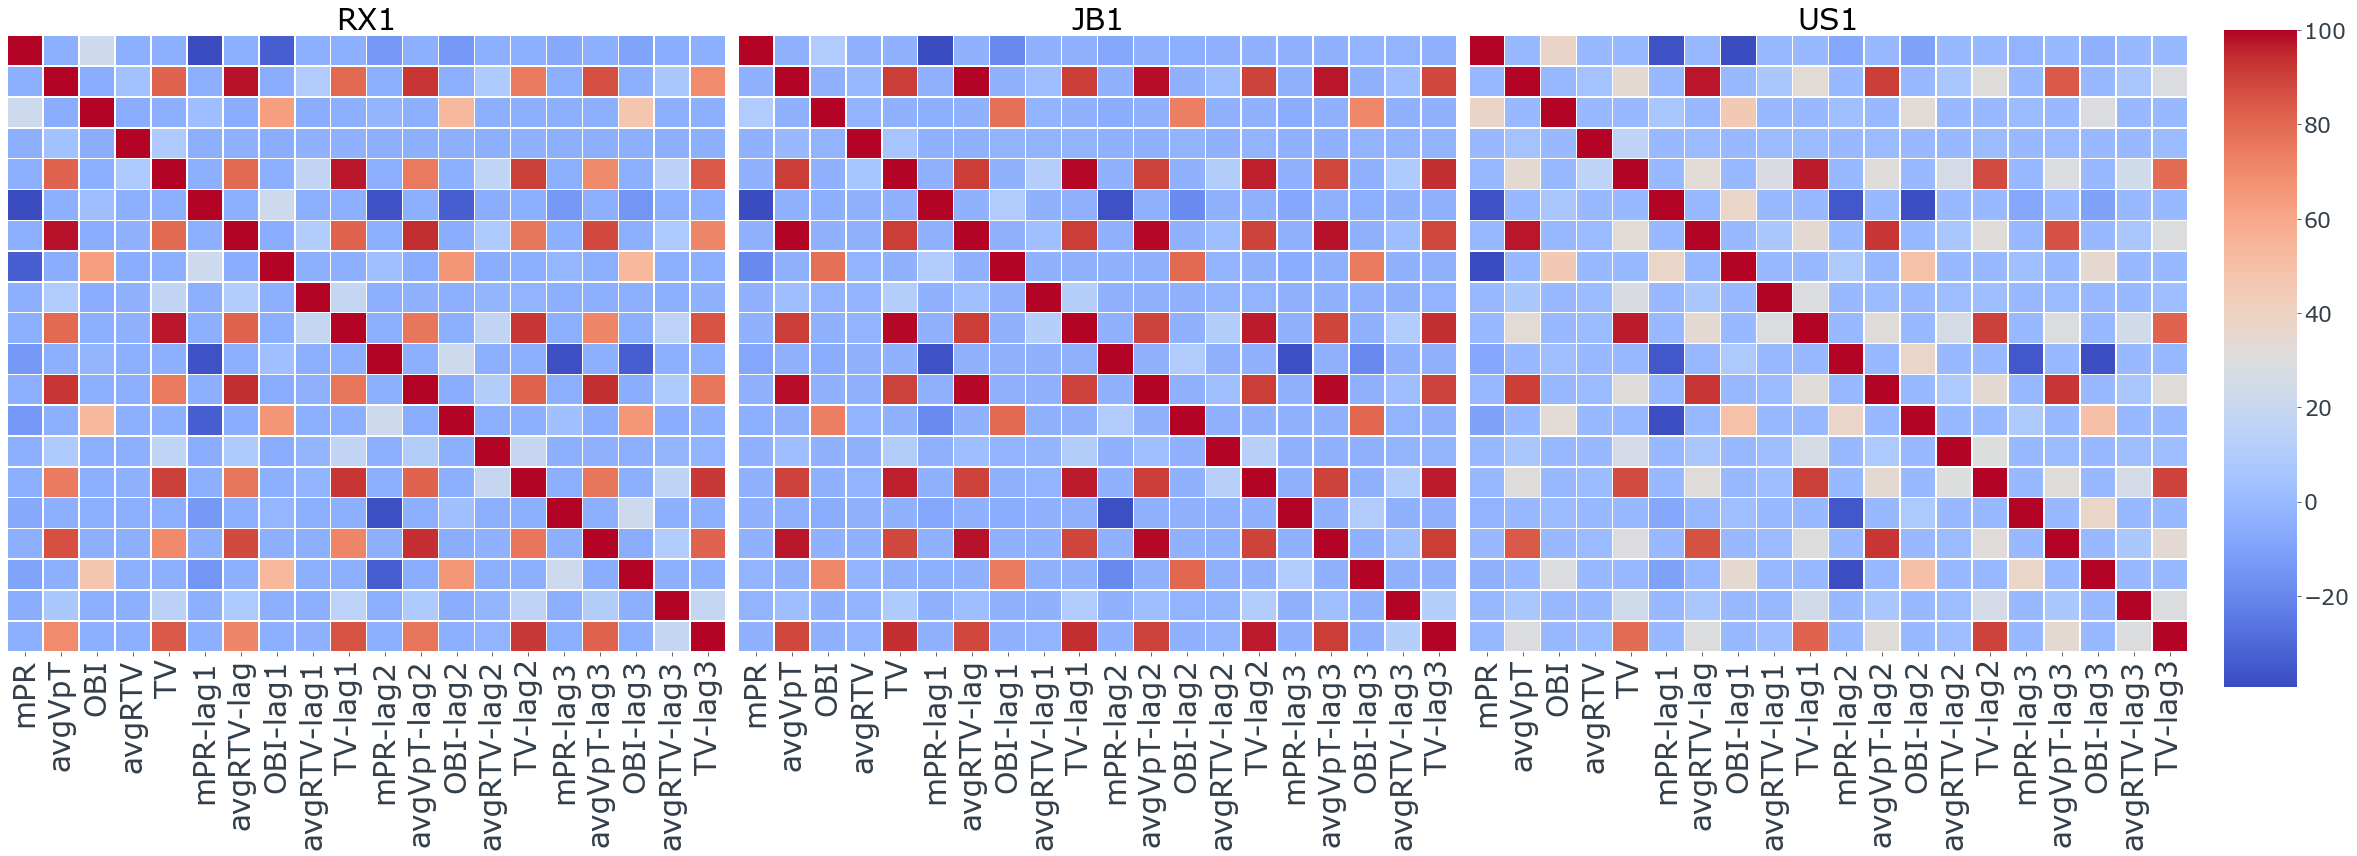

In [68]:
create_heatmaps_three(rx1df1new, jb1df2new, us1df3new, 'RX1', 'JB1', 'US1', figuresLocation, tick_fontsize=30)

In [46]:
def find_high_corr_latex(df1, df2, df3, df1_name, df2_name, df3_name, threshold):
    # Calculate correlation matrix for each dataframe
    corr_df1 = df1.corr()
    corr_df2 = df2.corr()
    corr_df3 = df3.corr()

    # List to store column pairs with high correlation
    high_corr_pairs = []

    # Iterate over upper triangle of correlation matrix
    cols = corr_df1.columns
    for i in range(0, len(cols)):
        for j in range(i + 1, len(cols)):
            # Check if correlation is above threshold in all dataframes
            if abs(corr_df1.iloc[i, j]) > threshold and abs(corr_df2.iloc[i, j]) > threshold and abs(corr_df3.iloc[i, j]) > threshold:
                high_corr_pairs.append((cols[i], cols[j]))

    # Generate LaTeX table
    latex_table = "\\begin{tabular}{|c|" + "|".join(["c"] * (len(cols) + 1)) + "|}\n"
    latex_table += "\\hline\n"
    latex_table += "Pairs & " + " & ".join([df1_name, df2_name, df3_name]) + " \\\\\n"
    latex_table += "\\hline\n"

    for pair in high_corr_pairs:
        row_values = [
            f"{corr_df1.loc[pair[0], pair[1]]:.2f}",
            f"{corr_df2.loc[pair[0], pair[1]]:.2f}",
            f"{corr_df3.loc[pair[0], pair[1]]:.2f}",
        ]
        latex_table += f"{pair[0]} - {pair[1]} & " + " & ".join(row_values) + " \\\\\n"

    latex_table += "\\hline\n"
    latex_table += "\\end{tabular}"

    return latex_table

In [ ]:
print(find_high_corr_latex(rx1df1new, jb1df2new, us1df3new, "RX1", "JB1", "US1",
                           0.5))
